# Curso de Capacitación en Python para Data Science - Desafío 5


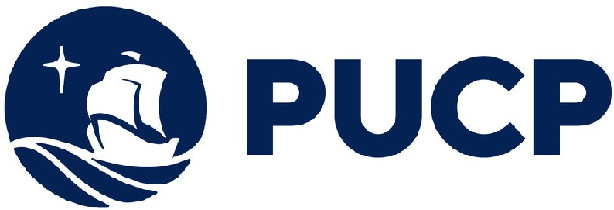


Dr. Edwin Villanueva, Dra. Soledad Espezua, Ing. Daniel Saromo

<font color='#33FFEE'> Regresión de datos en Python.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio5_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

## Desafío de la semana <font color=red> (20 puntos) </font>

In [1]:
# Cargar librerias y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algoritmos de regresion
from sklearn.linear_model import LinearRegression   # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression

# Estrategias de validacion
from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds

# Metricas de evaluacion
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion 
from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño 
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion

###  Dataset

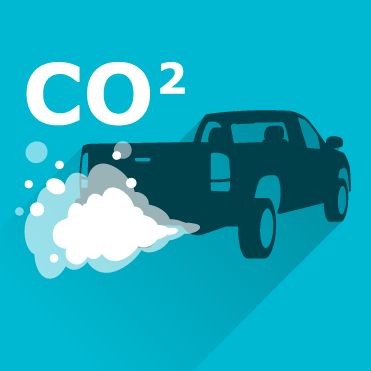

Se tiene el dataset  (<b>VehicleFuelConsumption.csv</b>)  que contiene informacion de diferentes tipos de vehiculos y algunos atributos:

    ENGINESIZE:  Tamaño del motor	
    CYLINDERS:   Numero de cilindros	
    FUELCONSUMPTION_CITY:   Consumo de combustible en ciudad (L/100 km)  	
    FUELCONSUMPTION_HWY	:   Consumo de combustible en carretera (L/100 km)
    FUELCONSUMPTION_COMB:   Consumo de combustible combinado  (L/100 km)	
    CO2EMISSIONS:    Emisiones de CO2 (g/km)
    
Se quiere predecir `CO2EMISSIONS`  (Target)  con base a los otros atributos

In [23]:
# carga el dataset housing 
filename = 'VehicleFuelConsumption.csv'
dataset = pd.read_csv(filename, delimiter=';')
dataset.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


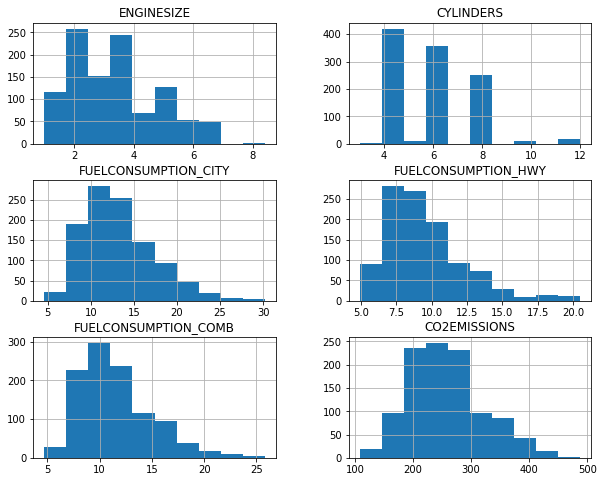

In [4]:
# muestra la distribucion de las variables
dataset.hist(figsize=(10,8))
plt.show()

## Preguntas para desarrollar

### Muestre la matriz de correlación (tanto la gráfica como los valores numéricos): <font color='red'>2 puntos</font>

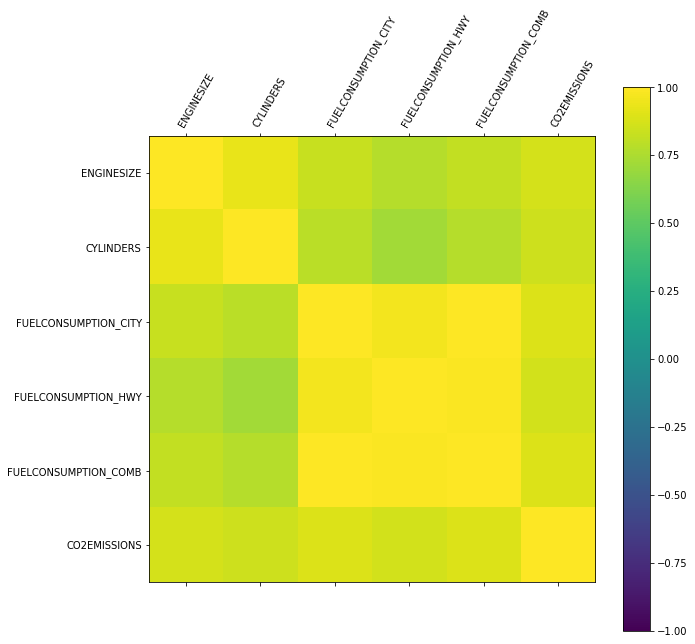

In [14]:
# plotea la matriz de correlacion
correlations = dataset.corr()

names = dataset.columns

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.setp(ax.get_xticklabels(), rotation=60, ha="left", rotation_mode="anchor")

plt.show()

Para visualizar mejor, podría definir el argumento `cmap` de la siguiente manera: `cmap="PuOr"`.

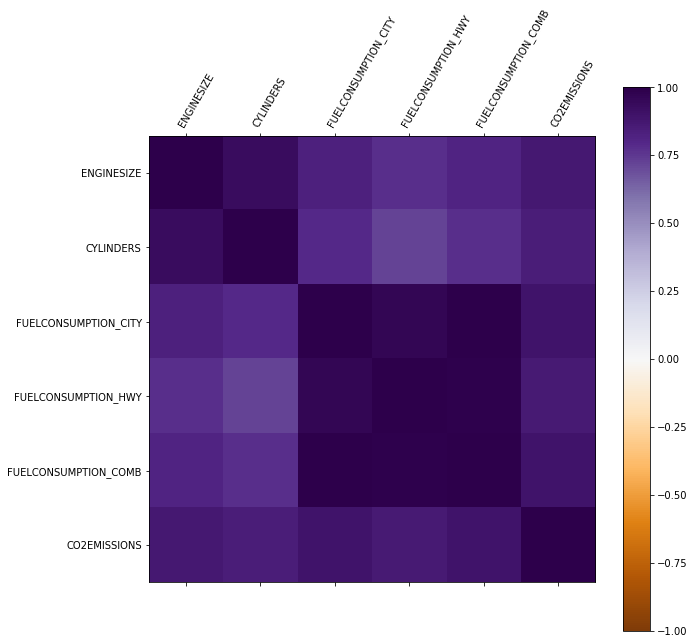

In [17]:
# plotea la matriz de correlacion
names = dataset.columns

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='PuOr')
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.setp(ax.get_xticklabels(), rotation=60, ha="left", rotation_mode="anchor")

plt.show()

plt.show()

In [18]:
correlations

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


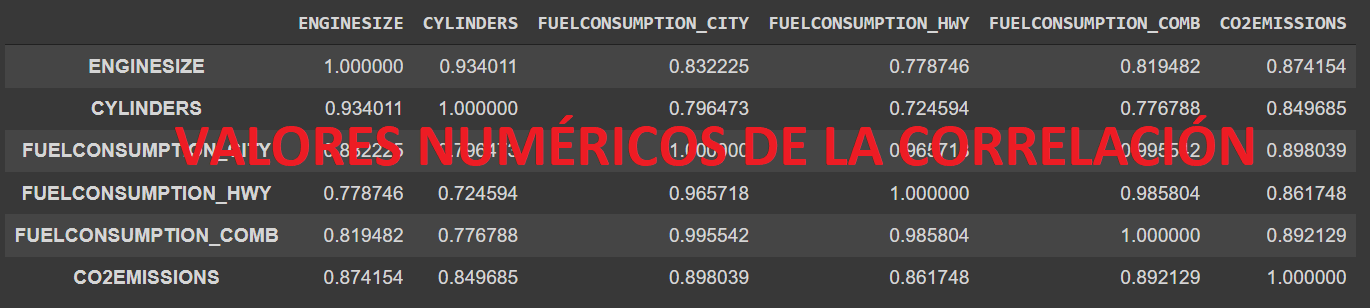

### Indique la pareja de atributos diferentes con la correlación más alta y la pareja de atributos diferentes con la correlación más baja. Los atributos deben ser diferentes (correlación diferente de 1). No considerar el target: <font color='red'>1 punto</font>

Reemplazar con los valores correctos.

Pareja de atributos con correlación máxima: FUELCONSUMPTION_CITY y FUELCONSUMPTION_COMB: 0.995542.

Pareja de atributos con correlación mínima: CYLINDERS y FUELCONSUMPTION_HWY: 0.724594.

### Usando un criterio basado en correlación, si se quisiera eliminar alguna de las variables, ¿de cuál de las parejas indicadas en la pregunta anterior se debería tomar la variable a descartar? Justifique: <font color='red'>1 punto</font>

De la pareja con la correlación más alta, ya que las variables dependen mucho entre sí, por lo que se tiene información redundante

### Con los atributos `'ENGINESIZE'`, `'CYLINDERS'`, `'FUELCONSUMPTION_COMB'`, `'FUELCONSUMPTION_HWY'`; evalúe los siguientes algoritmos en su capacidad de generar predictores para `'CO2EMISSIONS'`: <font color='red'>5 puntos</font>


    - Linear Regression (LinearReg)
    - Ridge Regression (Ridge).
    - Lasso Regression (Lasso)
    - Elastic Net Regression (ElasticNet)
    - KNN regression (KNN)Y
  
    

Deberá realizar primero un split train-validacion, reservando el 20% de datos para validacion. La evaluacion de los algoritmos debera hacerlo sobre los datos de train en estrategia de 10-fold-CV usando la funcion de scoring=`'neg_mean_squared_error'`. Muestre boxplots con los resultados de crossvalidacion.

In [24]:
dataset = dataset.drop('FUELCONSUMPTION_CITY', axis=1)

array = dataset.values
X = array[:,0:4] # atributos
y = array[:,4]    # target

# realiza el train-test split 
test_size = 0.20
seed = 7
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 853 ejemplos. Validation: 214 ejemplos


In [26]:
# Definimos el pool de algoritmos de ML a evaluar
algos = []
algos.append(('LinearReg', LinearRegression()))
algos.append(('Ridge', Ridge()))
algos.append(('Lasso', Lasso()))
algos.append(('ElasticNet', ElasticNet()))
algos.append(('KNN', KNeighborsRegressor()))

In [27]:
results = []
names = []

seed = 7   
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)

for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LinearReg: -592.4081576371182 (101.77194544857153)
Ridge: -592.3597185193942 (101.86460374686908)
Lasso: -590.8129464466456 (104.49936895667474)
ElasticNet: -601.3942494488831 (119.49352874892125)
KNN: -216.7201083447332 (106.43285687945503)


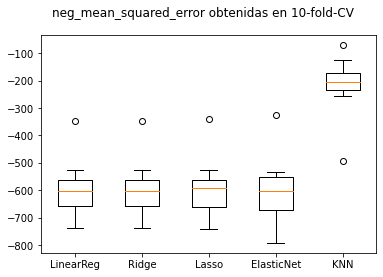

In [28]:
# Muestra graficamente los resultados de neg_mean_absolute_error  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('neg_mean_squared_error obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Elija el mejor algoritmo (justificando) y entrene con él un modelo con toda la data de train y prediga los datos de validación: <font color='red'>2 puntos</font>

Comentario: El algoritmo KNN es el mejor para entrenar el modelo. Tiene la mejor media y una varianza mínima.

In [30]:
# Reentrena con KNN sobre los datos de entrenamiento y lo prueba con el conjunto de validación
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### Reporte el Mean squared error, Mean absolute error, Explained variance score y R2 score: <font color='red'>2 puntos</font>

In [31]:
# predice el target en el conjunto de validacion
y_predicted = model.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

Mean squared error: 127.98953271028032
Mean absolute error: 5.128971962616821
Explained variance score: 0.9643377504984757
R2 score: 0.9641223295646675


### Plotee, usando un scatter plot, los valores reales vs los predichos (en el conjunto de validación). Comente los resultados: <font color='red'>2 puntos</font>

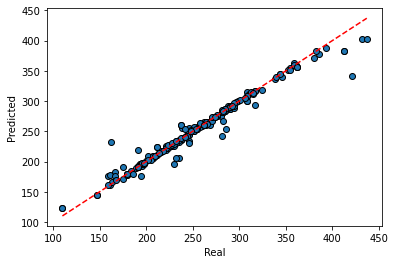

In [37]:
fig, ax = plt.subplots()
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Comentario: Se puede apreciar que el modelo tiene muy pocos errores comparando los valores predichos con los valores reales.

### Repita los 4 pasos anteriores, pero esta vez realice su análisis evaluando pipelines (estandarizacion + algoritmo de Regresion). Compare los resultados con respecto a los resultados obtenidos previamente (en el análisis sin estandarización ni pipelines), y comente: <font color='red'>5 puntos</font>


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Definimos el pool de pipelines de ML (estandarizacion + algoritmo de ML) a evaluar
pipelines = []
pipelines.append(('LinearReg', make_pipeline(StandardScaler(), LinearRegression())))
pipelines.append(('Ridge', make_pipeline(StandardScaler(), Ridge())))
pipelines.append(('Lasso', make_pipeline(StandardScaler(), Lasso())))
pipelines.append(('ElasticNet', make_pipeline(StandardScaler(), ElasticNet())))
pipelines.append(('KNN', make_pipeline(StandardScaler(), KNeighborsRegressor())))

In [39]:
# Evaluamos cada pipeline de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7   
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)

for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

LinearReg: -592.4081576371178 (101.77194544857117)
Ridge: -592.1929514317605 (102.0805999680373)
Lasso: -591.1004813496919 (98.84169732096197)
ElasticNet: -651.9492306710738 (93.3106974202447)
KNN: -229.56357373461015 (122.45023440239392)


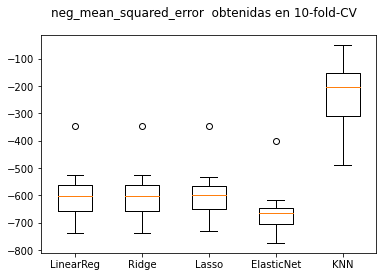

In [40]:
# Muestra graficamente los resultados de neg_mean_squared_error en crossvalidacion de los pipelines evaluados
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Comentario: KNN sigue siendo el mejor algoritmo para desarrollar el modelo, aunque se aprecia una media menor y una mayor varianza.

Mean squared error: 147.28
Mean absolute error: 6.147663551401869
Explained variance score: 0.9587916611343047
R2 score: 0.958714879335665


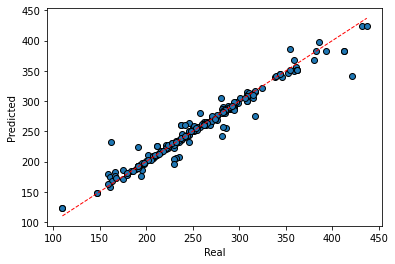

In [41]:
# Reentrena el pipeline con KNN sobre los datos de entrenamiento y lo prueba en el conjunto de validación
modelpipeline = make_pipeline(StandardScaler(), KNeighborsRegressor()) 
modelpipeline.fit(X_train, y_train)

# predice el target en el conjunto de validacion
y_predicted = modelpipeline.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

# Plotea los valores reales vs los predichos en el conjunto de validacion
fig, ax = plt.subplots()
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=1)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Comentario: El algoritmo KNN sigue teniendo un desempeño satisfactorio, siendo un buen predictor.